We trained five different tokenizers on various dataset sizes with vocab size = 16000 and found wordpiece to work the best because of it's tokenizing algorithm, fertility scores, and other factors for language malayalam. So now we train wordpiece tokenizer on 5 different datasets (non overlapping) which is around 500-600 MBs with vocab size = 32768 and again find the best among those.

## Splitting the scraped dataset into 5 parts

In [ ]:
import os
import shutil

# Define the parent folder path
parent_folder ='/Users/heerkubadia/Desktop/Sem - 5/Natural Language Processing/FINAL_PROCESSED'

# Function to get all text files and their sizes
def get_text_files_and_sizes(parent_folder):
    files = []
    for root, dirs, files_in_dir in os.walk(parent_folder):
        for file in files_in_dir:
            if file.endswith('.txt'):  # Only consider text files
                file_path = os.path.join(root, file)
                size = os.path.getsize(file_path)
                files.append((file_path, size, root.split(os.sep)[-1]))  # (file path, size, subfolder name)
    return files

# Function to divide files into 5 parts using greedy approach
def divide_into_parts(files, num_parts=5):
    # Sort files by size in descending order (largest file first)
    files.sort(key=lambda x: x[1], reverse=True)
    
    # Initialize parts and part sizes
    parts = [[] for _ in range(num_parts)]
    part_sizes = [0] * num_parts

    # Greedily assign files to the part with the smallest current size
    for file in files:
        # Find the part with the minimum size
        min_part_index = part_sizes.index(min(part_sizes))
        parts[min_part_index].append(file)
        part_sizes[min_part_index] += file[1]

    return parts

# Function to move files and rename them to 'subfolder_name_file_name'
def move_and_rename_files(parts, output_dir):
    for i, part in enumerate(parts):
        part_folder = os.path.join(output_dir, f'part_{i+1}')
        os.makedirs(part_folder, exist_ok=True)
        for file in part:
            original_path = file[0]
            new_name = f"{file[2]}_{os.path.basename(original_path)}"
            new_path = os.path.join(part_folder, new_name)
            shutil.copy(original_path, new_path)

# Main function
def main():
    # Step 1: Get all files and their sizes
    files = get_text_files_and_sizes(parent_folder)

    # Step 2: Divide files into 5 parts using the greedy approach
    parts = divide_into_parts(files)

    # Step 3: Move and rename files into parts
    output_dir = '/Users/heerkubadia/Desktop/Sem - 5/Natural Language Processing/WORDPIECE'
    move_and_rename_files(parts, output_dir)

    print(f"Files successfully divided into {output_dir}")

if __name__ == '__main__':
    main()


In [ ]:
import os

# Define the input file path and output directory
input_file = '/Users/heerkubadia/Desktop/Sem - 5/Natural Language Processing/WORDPIECE/part_1/samanantar_samanantar.txt'
output_dir = '/Users/heerkubadia/Desktop/Sem - 5/Natural Language Processing/WORDPIECE/part_1'

# Function to split the file into 10 parts
def split_file(input_file, output_dir, num_parts=10):
    # Read the content of the file
    with open(input_file, 'r') as file:
        content = file.read()

    # Calculate the size of each part (approximately)
    part_size = len(content) // num_parts

    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Split the content into parts and save them to new files
    for i in range(num_parts):
        # Calculate the start and end indices for each part
        start_index = i * part_size
        # Ensure the last part captures the rest of the content
        end_index = (i + 1) * part_size if i < num_parts - 1 else len(content)
        
        # Extract the part of the content
        part_content = content[start_index:end_index]

        # Define the name of the part file
        part_file = os.path.join(output_dir, f'part_{i+1}.txt')

        # Write the part to a new file
        with open(part_file, 'w') as part:
            part.write(part_content)
        
    print(f"File has been split into {num_parts} parts at {output_dir}")

# Main function to call the split_file function
def main():
    split_file(input_file, output_dir)

if __name__ == '__main__':
    main()


In [ ]:
import os
import csv

# Define the parent folder path containing subfolders with text files
parent_folder = '/Users/heerkubadia/Desktop/Sem - 5/Natural Language Processing/WORDPIECE'

# Function to create a CSV for each folder
def create_csv_for_folders(parent_folder):
    # Traverse through each subfolder in the parent folder
    for root, dirs, files in os.walk(parent_folder):
        # Filter text files in the current directory (root)
        text_files = [file for file in files if file.endswith('.txt')]
        
        if text_files:  # Proceed only if there are text files in the folder
            # Define CSV file path (name it after the current subfolder)
            folder_name = os.path.basename(root)
            csv_path = os.path.join(root, f"{folder_name}.csv")
            
            # Open the CSV file for writing
            with open(csv_path, mode='w', newline='', encoding='utf-8') as csv_file:
                writer = csv.writer(csv_file)
                
                # Write the header row
                writer.writerow(['Serial Number', 'Source Name', 'Text'])
                
                # Write data from each text file into the CSV
                for serial_number, text_file in enumerate(text_files, start=1):
                    text_file_path = os.path.join(root, text_file)
                    
                    # Read the text content of the file
                    with open(text_file_path, 'r', encoding='utf-8') as file:
                        text_content = file.read()
                    
                    # Write a row in the CSV file
                    writer.writerow([serial_number, text_file, text_content])
            
            print(f"CSV created for folder: {root} -> {csv_path}")

# Main function
def main():
    create_csv_for_folders(parent_folder)

if __name__ == '__main__':
    main()


## Training wordpiece on the 5 datasets

In [ ]:
vocab_size = 32768  # Vocabulary size for tokenizer

data_path_1 = "/Users/heerkubadia/Desktop/Sem - 5/Natural Language Processing/WORDPIECE_CSV/wp_1.csv" 
data_path_2 = "/Users/heerkubadia/Desktop/Sem - 5/Natural Language Processing/WORDPIECE_CSV/wp_2.csv" 
data_path_3 = "/Users/heerkubadia/Desktop/Sem - 5/Natural Language Processing/WORDPIECE_CSV/wp_3.csv" 
data_path_4 = "/Users/heerkubadia/Desktop/Sem - 5/Natural Language Processing/WORDPIECE_CSV/wp_4.csv" 
data_path_5 = "/Users/heerkubadia/Desktop/Sem - 5/Natural Language Processing/WORDPIECE_CSV/wp_5.csv"  

save_path_1 = "/Users/heerkubadia/Desktop/Sem - 5/Natural Language Processing/WORDPIECE_CSV/malayalam_wp_v1"
save_path_2 = "/Users/heerkubadia/Desktop/Sem - 5/Natural Language Processing/WORDPIECE_CSV/malayalam_wp_v2"
save_path_3 = "/Users/heerkubadia/Desktop/Sem - 5/Natural Language Processing/WORDPIECE_CSV/malayalam_wp_v3"
save_path_4 = "/Users/heerkubadia/Desktop/Sem - 5/Natural Language Processing/WORDPIECE_CSV/malayalam_wp_v4"
save_path_5 = "/Users/heerkubadia/Desktop/Sem - 5/Natural Language Processing/WORDPIECE_CSV/malayalam_wp_v5"

In [ ]:
import os
import time
import pandas as pd
from tokenizers import BertWordPieceTokenizer
from transformers import PreTrainedTokenizerFast

def train_wordpiece_tokenizer(data_path, vocab_size, model_name):
    st = time.time()
    print(f"Vocabulary size: {vocab_size}")
    print(f"Model save path: {model_name}")

    tokenizer = BertWordPieceTokenizer(
        clean_text=True,
        handle_chinese_chars=False,
        strip_accents=False,
        lowercase=True,
    )

    # Reading the CSV file
    df = pd.read_csv(data_path)
    print(f"No. of files: {len(df)}")
    text_column = df.iloc[:, 2]  # Accessing the third column which has the text
    special_tokens = ["[PAD]", "[CLS]", "[SEP]", "[MASK]", "[UNK]", "[BOS]", "[EOS]", "[USER]", "[ASSISTANT]"]

    # Preprocess the text
    text_column = text_column.str.replace(r'\d+', '', regex=True)
    text_column = text_column.apply(lambda x: f"{special_tokens[5]} {x} {special_tokens[6]}")  # Adding <bos> and <eos>

    try:
        tokenizer.train_from_iterator(
            text_column,
            vocab_size=vocab_size,
            min_frequency=5,
            special_tokens=special_tokens,
            show_progress=True,
        )
    except Exception as e:
        print("Error in training tokenizer:", e)
        print(f"Training interrupted after {(time.time() - st) / 60:.2f} minutes")

    print("Completed tokenizer training.")

    # Create the directory if it doesn't exist
    os.makedirs(model_name, exist_ok=True)

    # Save the tokenizer as a fast tokenizer
    # Convert BertWordPieceTokenizer to PreTrainedTokenizerFast
    fast_tokenizer = PreTrainedTokenizerFast(
        tokenizer_object=tokenizer,
        unk_token="[UNK]",
        pad_token="[PAD]",
        cls_token="[CLS]",
        sep_token="[SEP]",
        mask_token="[MASK]",
        bos_token="[BOS]",
        eos_token="[EOS]"
    )

    # Save the tokenizer
    fast_tokenizer.save_pretrained(model_name)
    print(f"Saved tokenizer to {model_name}")

    et = time.time()
    print(f"Training completed in {(et - st) / 60:.2f} minutes")


In [ ]:
train_wordpiece_tokenizer(data_path= data_path_1, vocab_size= vocab_size, model_name=save_path_1)

In [ ]:
train_wordpiece_tokenizer(data_path= data_path_2, vocab_size= vocab_size, model_name=save_path_2)

In [ ]:
train_wordpiece_tokenizer(data_path= data_path_3, vocab_size= vocab_size, model_name=save_path_3)

In [ ]:
train_wordpiece_tokenizer(data_path= data_path_3, vocab_size= vocab_size, model_name=save_path_3)

In [ ]:
train_wordpiece_tokenizer(data_path= data_path_4, vocab_size= vocab_size, model_name=save_path_4)

In [ ]:
train_wordpiece_tokenizer(data_path= data_path_5, vocab_size= vocab_size, model_name=save_path_5)

## Fertility Scores

In [ ]:
from tokenizers import Tokenizer
import numpy as np

In [ ]:
tokenizer_path_1 = "/Users/heerkubadia/Desktop/Sem - 5/Natural Language Processing/WORDPIECE_CSV/malayalam_wp_v1/tokenizer.json"
tokenizer_path_2 = "/Users/heerkubadia/Desktop/Sem - 5/Natural Language Processing/WORDPIECE_CSV/malayalam_wp_v2/tokenizer.json"
tokenizer_path_3 = "/Users/heerkubadia/Desktop/Sem - 5/Natural Language Processing/WORDPIECE_CSV/malayalam_wp_v3/tokenizer.json"
tokenizer_path_4 = "/Users/heerkubadia/Desktop/Sem - 5/Natural Language Processing/WORDPIECE_CSV/malayalam_wp_v4/tokenizer.json"
tokenizer_path_5 = "/Users/heerkubadia/Desktop/Sem - 5/Natural Language Processing/WORDPIECE_CSV/malayalam_wp_v5/tokenizer.json"

data_path_1 = "/Users/heerkubadia/Desktop/Sem - 5/Natural Language Processing/WORDPIECE_CSV/wp_1.csv" 
data_path_2 = "/Users/heerkubadia/Desktop/Sem - 5/Natural Language Processing/WORDPIECE_CSV/wp_2.csv" 
data_path_3 = "/Users/heerkubadia/Desktop/Sem - 5/Natural Language Processing/WORDPIECE_CSV/wp_3.csv" 
data_path_4 = "/Users/heerkubadia/Desktop/Sem - 5/Natural Language Processing/WORDPIECE_CSV/wp_4.csv" 
data_path_5 = "/Users/heerkubadia/Desktop/Sem - 5/Natural Language Processing/WORDPIECE_CSV/wp_5.csv" 

column_name = 'Text'

In [ ]:
tokenizer_1 = Tokenizer.from_file(tokenizer_path_1)
tokenizer_2 = Tokenizer.from_file(tokenizer_path_2)
tokenizer_3 = Tokenizer.from_file(tokenizer_path_3)
tokenizer_4 = Tokenizer.from_file(tokenizer_path_4)
tokenizer_5 = Tokenizer.from_file(tokenizer_path_5)


In [ ]:
!pip install git+https://github.com/anoopkunchukuttan/indic_nlp_library.git

In [ ]:
from indicnlp.tokenize import indic_tokenize

In [ ]:
def calculate_fertility_score(data_path, tokenizer):
    # Read the data (assuming it's a CSV file)
    df = pd.read_csv(data_path)
    text_column = df.iloc[:, 2]  # Assuming the text is in the 3rd column

    # Get word count in documents (using basic word tokenization for counting words)
    df_word_count = []
    for sentence in text_column:
        if isinstance(sentence, float):
            sentence = ""  # Replace with an empty string, or you can choose to skip it
        tokens = indic_tokenize.trivial_tokenize(sentence)  # Tokenizing using indicnlp
        df_word_count.append(len(tokens)) # Simple split for word count
    np_word_count = np.array(df_word_count)

    # Tokenize the documents using your trained tokenizer
    df_token_count = []
    for sentence in text_column:
        if not isinstance(sentence, str):
            sentence = "" 
        tokenized_output = tokenizer.encode(sentence)  # Tokenize the sentence
        df_token_count.append(len(tokenized_output.tokens))  # Count the tokens
    np_token_count = np.array(df_token_count)

    # Calculate the fertility score
    fertility_score = np.mean(np_token_count / np_word_count)

    print(f"Fertility score: {fertility_score}")
    return fertility_score


In [ ]:
calculate_fertility_score(data_path= data_path_1, tokenizer=tokenizer_1)

In [ ]:
calculate_fertility_score(data_path= data_path_2, tokenizer=tokenizer_2)

In [ ]:
calculate_fertility_score(data_path= data_path_3, tokenizer=tokenizer_3)

In [ ]:
calculate_fertility_score(data_path= data_path_4, tokenizer=tokenizer_4)

In [ ]:
calculate_fertility_score(data_path= data_path_5, tokenizer=tokenizer_5)

## Graph of Fertility scores vs Tokenizers

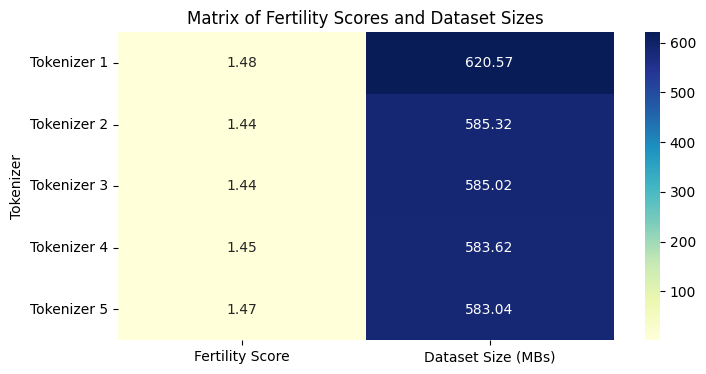

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for demonstration
data = {
    'Tokenizer': ['Tokenizer 1', 'Tokenizer 2', 'Tokenizer 3', 'Tokenizer 4', 'Tokenizer 5'],
    'Fertility Score': [1.477, 1.442, 1.443, 1.449,1.469],  # Example fertility scores
    'Dataset Size (MBs)': [620.57,585.32,585.02,583.62,583.04]    # Example dataset sizes
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set up the DataFrame with Tokenizer as the index for easier heatmap labeling
df_heatmap = df.set_index('Tokenizer')

# Plot a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df_heatmap, annot=True, cmap="YlGnBu", fmt=".2f", cbar=True)
plt.title("Matrix of Fertility Scores and Dataset Sizes")
plt.show()


Based on the graph above we choose tokenizer 2 as its fertility score is the least (1.442)